#### Gocery Store Data set cleaning

Dataset: 

- _retail_grocery_dataset.zip_
    - _products.csv_
    - _suppliers.csv_
    - _inventory.csv_
    - _transaction.csv_
    - _customers.csv_
    - _salesforce.csv_
 
Author: Luis Sergio Pastrana Lemus  
Date: 2025-07-06

# Data Cleaning – Retail Grocery Dataset

## __1. Libraries__.

In [1]:
from pathlib import Path
import sys

# Define project root dynamically, gets the current directory from which the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:

    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *


from IPython.display import display, HTML
import os
import pandas as pd

## __2. Path to Data file__.

In [2]:
# Build route to data file and upload
data_file_path = project_root / "data" / "raw" / "retail_grocery_dataset.zip"
df_products = load_dataset_from_zip(data_file_path, "products.csv", sep=';', header='infer', decimal=',', keep_default_na=False)
df_suppliers = load_dataset_from_zip(data_file_path, "suppliers.csv", sep='|', header='infer', decimal=',', keep_default_na=False)
df_inventory = load_dataset_from_zip(data_file_path, "inventory.csv", header='infer', keep_default_na=False)
df_transactions = load_dataset_from_zip(data_file_path, "transactions.csv", sep='\t', header='infer', decimal=',', keep_default_na=False)
df_customers = load_dataset_from_zip(data_file_path, "customers.csv", sep=';', header='infer', keep_default_na=False)
df_salesforce = load_dataset_from_zip(data_file_path, "salesforce.csv", sep='|', header='infer', keep_default_na=False)


##### `LSPL`

**Note:** `keep_default_na=False` is used to later convert missing values to `pd.NA`.  
This is beneficial because `pd.NA` provides:

- Consistency across data types  
- Type integrity preservation  
- Cleaner logical operations  
- Improved control over missing data

Since high performance or heavy computation is not required here, using `pd.NA` is appropriate.

In [3]:
# Format notebook output
format_notebook()

## __3. Data set cleaning__.

In [4]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11556 entries, 0 to 11555
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    11556 non-null  int64  
 1   product_name  11556 non-null  object 
 2   category      11556 non-null  object 
 3   supplier_id   11556 non-null  int64  
 4   unit_cost     11556 non-null  object 
 5   status        11556 non-null  object 
 6   brand         11556 non-null  object 
 7   list_price    11556 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 722.4+ KB


In [5]:
df_products

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price
0,1,Use Bakery,Bakery,1664,"4,58",Active,Warren-Foster,5.99
1,2,Thank Frozen Foods,Dairy,1662,"5,43",Backordered,Evans and Sons,7.03
2,3,Customer Produce,Beverages,917,"1,83",Backordered,Newman and Sons,2.73
3,4,Sign Dairy,Produce,268,"8,99",Active,Mclaughlin-Little,14.17
4,5,Place Frozen Foods,Bakery,964,"73,3",Backordered,"Leblanc, James and Thompson",11.08
...,...,...,...,...,...,...,...,...
11551,9169,Set Frozen Foods,Produce,64,"1,89",Backordered,Silva-Haynes,2.81
11552,4857,Green Beverages,Produce,1131,"7,49",Discontinued,Garcia Inc,12.98
11553,470,South Frozen Foods,Dairy,755,"3,89",Active,Smith-Baker,5.08
11554,7711,Cause Beverages,Snacks,447,"7,49",Active,Powell PLC,12.69


In [6]:
df_suppliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   supplier_id     2334 non-null   int64  
 1   supplier_name   2334 non-null   object 
 2   lead_time_days  2334 non-null   int64  
 3   contact_info    2334 non-null   object 
 4   rating          2334 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 91.3+ KB


In [7]:
df_suppliers

,supplier_id,supplier_name,lead_time_days,contact_info,rating
0,1,Stevens LLC,10,365-261-6825,4.69
1,2,Simpson-Pugh,8,001-322-445-9942,3.85
2,3,Harrison Ltd,5,(745)078-2755,3.53
3,4,Larson-Orozco,4,347.918.3271x629,4.18
4,5,Gray-Lopez,6,+1-453-092-4991,3.85
...,...,...,...,...,...
2329,1069,Bradley-Price,9,(785)560-0541x4189,4.74
2330,1855,"Jimenez, Bell and Barrett",11,315-249-0083x58312,3.97
2331,1630,Norman and Sons,3,984.733.8502,4.34
2332,1629,"Chen, Hughes and Price",12,+1-267-395-1106x17465,4.59


In [8]:
df_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22610 entries, 0 to 22609
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   inventory_id        22610 non-null  int64 
 1   date                22610 non-null  object
 2   product_id          22610 non-null  int64 
 3   beginning_stock     22610 non-null  int64 
 4   received            22610 non-null  int64 
 5   sold                22610 non-null  int64 
 6   warehouse_location  22610 non-null  object
 7   ending_stock        22610 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB


In [9]:
df_inventory

,inventory_id,date,product_id,beginning_stock,received,sold,warehouse_location,ending_stock
0,1,2025-06-20,1505,49,12,7,East,54
1,2,2025-05-13,1611,55,2,6,South,51
2,3,2025-07-02,1310,82,5,3,North,84
3,4,2025-05-14,2355,14,11,14,West,11
4,5,2025-06-13,8382,39,17,11,East,45
...,...,...,...,...,...,...,...,...
22605,1261,2025-06-26,7387,92,12,11,North,93
22606,1450,2025-06-29,9817,33,0,7,North,26
22607,8169,2025-05-27,5713,49,9,10,West,48
22608,4535,2025-05-16,7121,41,16,7,West,50


In [10]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21634 entries, 0 to 21633
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  21634 non-null  int64  
 1   date            21634 non-null  object 
 2   product_id      21634 non-null  int64  
 3   units_sold      21634 non-null  int64  
 4   customer_id     21634 non-null  int64  
 5   employee_id     21634 non-null  int64  
 6   list_price      21634 non-null  float64
 7   sales_amount    21634 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [11]:
df_transactions

,transaction_id,date,product_id,units_sold,customer_id,employee_id,list_price,sales_amount
0,1,2024-05-11,68,3,3240,748,25.00,75.00
1,2,2024-11-15,5042,6,2246,624,2.45,14.70
2,3,2024-03-19,7165,6,4387,139,2.68,16.08
3,4,2024-05-26,8859,7,2163,778,9.15,64.05
4,5,2024-01-24,4700,5,4297,1429,3.56,17.80
...,...,...,...,...,...,...,...,...
21629,19873,2025-03-30,8349,1,1611,1238,20.61,20.61
21630,11194,2023-12-24,7061,8,2050,223,18.44,147.52
21631,8909,2023-09-21,5728,9,771,1763,22.39,201.51
21632,10211,2024-12-17,3709,8,2444,118,20.25,162.00


In [12]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    5433 non-null   int64 
 1   customer_name  5433 non-null   object
 2   join_date      5433 non-null   object
 3   total_spent    5433 non-null   object
 4   frequency      5433 non-null   int64 
 5   segment        5433 non-null   object
dtypes: int64(2), object(4)
memory usage: 254.8+ KB


In [13]:
df_customers

,customer_id,customer_name,join_date,total_spent,frequency,segment
0,1,Charles Miller,2024-08-13,294.24,12,Occasional
1,2,Michael Long,2024-09-03,4011.83,7,Frequent
2,3,Kimberly Green,2024-01-23,,15,High Value
3,4,Beverly Bowers,2024-11-03,1403.0,13,Occasional
4,5,Pamela Berg,2024-08-05,1354.18,18,High Value
...,...,...,...,...,...,...
5428,4570,Charles Oneal,2023-09-07,550.79,11,Frequent
5429,3122,Ryan Guzman,2024-07-26,4137.12,24,Occasional
5430,143,Julia Little,2024-09-25,2568.29,23,High Value
5431,2554,Julia Shelton,2025-01-23,447.84,28,Occasional


In [14]:
df_salesforce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   employee_id    2209 non-null   int64  
 1   employee_name  2209 non-null   object 
 2   region         2209 non-null   object 
 3   total_sales    2209 non-null   float64
 4   effectiveness  2209 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 86.4+ KB


In [15]:
df_salesforce

,employee_id,employee_name,region,total_sales,effectiveness
0,1,Angela Marks,North,75912.60,0.73
1,2,Richard Ayala,South,55019.09,0.88
2,3,Dr. Mark Bailey,South,37066.43,0.66
3,4,Mark Miller,South,47485.74,0.74
4,5,Zachary Bond,West,74696.77,0.65
...,...,...,...,...,...
2204,1627,Kelsey Ray,South,91797.62,0.75
2205,943,David Short,East,51261.00,0.71
2206,1636,Christy Prince,North,83904.99,0.90
2207,569,Julie Roberts,South,62354.57,0.62


### 3.1. Standardizing String values using "snake case".

#### 3.1.1 Standardizing Column Labels.

In [16]:
# Standardize column labels with snake_case format
df_products = normalize_columns_headers_format(df_products)
df_products.columns

Index(['product_id', 'product_name', 'category', 'supplier_id', 'unit_cost', 'status', 'brand', 'list_price'], dtype='object')

In [17]:
df_suppliers = normalize_columns_headers_format(df_suppliers)
df_suppliers.columns

Index(['supplier_id', 'supplier_name', 'lead_time_days', 'contact_info', 'rating'], dtype='object')

In [18]:
df_inventory = normalize_columns_headers_format(df_inventory)
df_inventory.columns

Index(['inventory_id', 'date', 'product_id', 'beginning_stock', 'received', 'sold', 'warehouse_location', 'ending_stock'], dtype='object')

In [19]:
df_transactions = normalize_columns_headers_format(df_transactions)
df_transactions.columns

Index(['transaction_id', 'date', 'product_id', 'units_sold', 'customer_id', 'employee_id', 'list_price', 'sales_amount'], dtype='object')

In [20]:
df_customers = normalize_columns_headers_format(df_customers)
df_customers.columns

Index(['customer_id', 'customer_name', 'join_date', 'total_spent', 'frequency', 'segment'], dtype='object')

In [21]:
df_salesforce = normalize_columns_headers_format(df_salesforce)
df_salesforce.columns

Index(['employee_id', 'employee_name', 'region', 'total_sales', 'effectiveness'], dtype='object')

#### 3.1.2 Standardizing Dataframe String values.

In [22]:
# Standardize data frame string values with snake_case format
df_products = normalize_string_format(df_products, include=['product_name', 'category', 'status', 'brand'])
df_products.sample(5, random_state=333)

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price
7697,7698,yourself_snacks,snacks,529,"9,76",discontinued,price_miller_and_hayes,15.26
103,104,turn_dairy,dairy,624,"5,63",active,jones_nguyen,8.67
356,357,in_produce,bakery,285,"16,3",discontinued,osborne_group,26.40
8567,8568,race_snacks,beverages,270,"8,03",discontinued,jones_munoz,10.82
2585,2586,military_frozen_foods,dairy,550,"18,76",discontinued,bowman_johnson,31.49


In [23]:
df_suppliers = normalize_string_format(df_suppliers, include=['supplier_name'])
df_suppliers.sample(5, random_state=333)

,supplier_id,supplier_name,lead_time_days,contact_info,rating
777,778,carey_ltd,7,001-048-347-8432,3.44
1888,1889,young_moore_and_gray,8,693.746.5203x900,3.63
1747,1748,green_lambert_and_ewing,9,(027)564-4892x093,4.60
1102,1103,russell_marshall,10,+1-754-817-5744x3688,4.76
605,606,wagner_farley_and_lawrence,5,+1-701-523-0381,4.92


In [24]:
df_inventory.sample(5, random_state=333)

,inventory_id,date,product_id,beginning_stock,received,sold,warehouse_location,ending_stock
19416,19417,2025-05-14,2214,88,4,2,South,90
1945,1946,2025-05-26,5656,93,19,14,West,98
15453,15454,2025-07-04,6168,32,8,5,South,35
12447,12448,2025-06-09,2467,33,17,7,East,43
17582,17583,2025-06-22,6810,18,2,13,North,7


In [25]:
df_transactions.sample(5, random_state=333)

,transaction_id,date,product_id,units_sold,customer_id,employee_id,list_price,sales_amount
1170,1171,2024-06-16,5776,6,4328,1683,14.13,84.78
19693,19694,2024-11-02,2401,3,3129,1637,27.36,82.08
20541,13239,2025-02-20,8763,4,4389,842,14.03,56.12
19423,19424,2024-10-28,5781,8,2388,630,17.88,143.04
10655,10656,2024-10-14,3715,5,3950,1697,14.51,72.55


In [26]:
df_customers = normalize_string_format(df_customers, include=['customer_name', 'segment'])
df_customers.sample(5, random_state=333)

,customer_id,customer_name,join_date,total_spent,frequency,segment
3240,3241,matthew_campbell,2024-02-29,996.08,9,occasional
378,379,robert_davis,2024-05-05,2565.12,29,frequent
4057,4058,debra_moran,2024-10-26,1427.04,15,occasional
3140,3141,terry_allen,2023-12-15,4478.88,36,occasional
3787,3788,barbara_sanders,2024-01-24,1219.22,14,high_value


In [27]:
df_salesforce = normalize_string_format(df_salesforce, include=['employee_name'])
df_salesforce.sample(5, random_state=333)

,employee_id,employee_name,region,total_sales,effectiveness
1818,1819,ashley_campos,East,69091.40,0.61
2202,732,mrs_jessica_bennett,West,68210.42,0.74
1681,1682,john_lee,South,63715.24,0.93
416,417,beverly_chen,West,45698.22,0.87
990,991,david_klein_dds,South,98697.66,0.77


##### `LSPL`

**Note:** 

The column names and string values did not follow a consistent format; they contained spaces and capital letters, making them difficult to manipulate.

__Solution__: Column names and string values were standardized using lowercase letters, removing spaces, and applying the snake_case format.   
__Impact__: This facilitated data access and manipulation, improving readability and reducing errors in analysis.

### 3.2 Explicit duplicates.

In [28]:
# Show explicit duplicates amount for "df_products"
display(HTML(f"> Explicit duplicates amount for Dataframe <i>'df_products'</i>: <b>{df_products.duplicated().sum()}</b>"))
display(HTML(f"> Dataframe <i>'df_products'</i> size (rows, columns): <b>{df_products.shape}</b>"))

In [29]:
df_products = df_products.drop_duplicates()
display(HTML(f"> Dataframe <i>'df_products'</i> size (rows, columns): <b>{df_products.shape}</b>"))

In [30]:
# Show explicit duplicates amount for "df_suppliers"
display(HTML(f"> Explicit duplicates amount for Dataframe <i>'df_suppliers'</i>: <b>{df_suppliers.duplicated().sum()}</b>"))
display(HTML(f"> Dataframe <i>'df_suppliers'</i> size (rows, columns): <b>{df_suppliers.shape}</b>"))

In [31]:
df_suppliers = df_suppliers.drop_duplicates()
display(HTML(f"> Dataframe <i>'df_suppliers'</i> size (rows, columns): <b>{df_suppliers.shape}</b>"))

In [32]:
# Show explicit duplicates amount for "df_inventory"
display(HTML(f"> Explicit duplicates amount for Dataframe <i>'df_inventory'</i>: <b>{df_inventory.duplicated().sum()}</b>"))
display(HTML(f"> Dataframe <i>'df_inventory'</i> size (rows, columns): <b>{df_inventory.shape}</b>"))

In [33]:
df_inventory = df_inventory.drop_duplicates()
display(HTML(f"> Dataframe <i>'df_inventory'</i> size (rows, columns): <b>{df_inventory.shape}</b>"))

In [34]:
# Show explicit duplicates amount for "df_transactions"
display(HTML(f"> Explicit duplicates amount for Dataframe <i>'df_transactions'</i>: <b>{df_transactions.duplicated().sum()}</b>"))
display(HTML(f"> Dataframe <i>'df_transactions'</i> size (rows, columns): <b>{df_transactions.shape}</b>"))

In [35]:
df_transactions = df_transactions.drop_duplicates()
display(HTML(f"> Dataframe <i>'df_transactions'</i> size (rows, columns): <b>{df_transactions.shape}</b>"))

In [36]:
# Show explicit duplicates amount for "df_customers"
display(HTML(f"> Explicit duplicates amount for Dataframe <i>'df_customers'</i>: <b>{df_customers.duplicated().sum()}</b>"))
display(HTML(f"> Dataframe <i>'df_customers'</i> size (rows, columns): <b>{df_customers.shape}</b>"))

In [37]:
df_customers = df_customers.drop_duplicates()
display(HTML(f"> Dataframe <i>'df_customers'</i> size (rows, columns): <b>{df_customers.shape}</b>"))

In [38]:
# Show explicit duplicates amount for "df_sales_force"
display(HTML(f"> Explicit duplicates amount for Dataframe <i>'df_salesforce'</i>: <b>{df_salesforce.duplicated().sum()}</b>"))
display(HTML(f"> Dataframe <i>'df_salesforce'</i> size (rows, columns): <b>{df_salesforce.shape}</b>"))

In [39]:
df_salesforce = df_salesforce.drop_duplicates()
display(HTML(f"> Dataframe <i>'df_salesforce'</i> size (rows, columns): <b>{df_salesforce.shape}</b>"))

##### `LSPL`

**Note:** 

- Explicit duplicates for dataframe 'df_products': 1556, were removed from dataset.   
- Explicit duplicates for dataframe 'df_suppliers': 334, were removed from dataset.   
- Explicit duplicates for dataframe 'df_inventory': 2610, were removed from dataset.   
- Explicit duplicates for dataframe 'df_transactions': 1634, were removed from dataset.   
- Explicit duplicates for dataframe 'df_customers': 433, were removed from dataset.   
- Explicit duplicates for dataframe 'df_salesforce': 209, were removed from dataset.   

### 3.3 Missing values.

#### 3.3.1 Missing values check.

In [40]:
# Show missing values
check_existing_missing_values(df_products)

In [41]:
check_existing_missing_values(df_suppliers)

In [42]:
check_existing_missing_values(df_inventory)

In [43]:
check_existing_missing_values(df_transactions)

In [44]:
check_existing_missing_values(df_customers)

In [45]:
check_existing_missing_values(df_salesforce)

##### `LSPL`

**Note:** 

- Missing values for dataframe 'df_products':  
    - 'unit_cost': 500 [''] were detected.   
    - 'brand': 500 [''] were detected.

- Missing values for dataframe 'df_inventory':
    - 'warehouse_location': 400 [''] were detected.

- Missing values for dataframe 'df_customers':
    - 'total_spent': 150 [''] were detected.
    - 'segment': 150 were detected.


#### 3.3.2 Replacing missing values (pd.NA).

In [46]:
# Replace missing values with pd.NA
df_products = replace_missing_values(df_products, include=['unit_cost', 'brand'])
df_products

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price
0,1,use_bakery,bakery,1664,"4,58",active,warren_foster,5.99
1,2,thank_frozen_foods,dairy,1662,"5,43",backordered,evans_and_sons,7.03
2,3,customer_produce,beverages,917,"1,83",backordered,newman_and_sons,2.73
3,4,sign_dairy,produce,268,"8,99",active,mclaughlin_little,14.17
4,5,place_frozen_foods,bakery,964,"73,3",backordered,leblanc_james_and_thompson,11.08
...,...,...,...,...,...,...,...,...
9995,9996,financial_bakery,snacks,1581,"5,93",backordered,sparks_llc,7.40
9996,9997,hospital_bakery,produce,1426,"15,42",discontinued,butler_inc,18.92
9997,9998,travel_bakery,produce,31,"13,28",backordered,carr_larson,23.15
9998,9999,learn_bakery,bakery,987,"18,32",active,turner_rodriguez,22.50


In [47]:
df_inventory = replace_missing_values(df_inventory, include=['warehouse_location'])
df_inventory

,inventory_id,date,product_id,beginning_stock,received,sold,warehouse_location,ending_stock
0,1,2025-06-20,1505,49,12,7,East,54
1,2,2025-05-13,1611,55,2,6,South,51
2,3,2025-07-02,1310,82,5,3,North,84
3,4,2025-05-14,2355,14,11,14,West,11
4,5,2025-06-13,8382,39,17,11,East,45
...,...,...,...,...,...,...,...,...
19995,19996,2025-05-25,7842,71,4,2,South,73
19996,19997,2025-05-22,4965,84,12,2,East,94
19997,19998,2025-05-19,6455,24,4,5,East,23
19998,19999,2025-06-21,2555,97,0,6,West,91


In [48]:
df_customers = replace_missing_values(df_customers, include=['total_spent', 'segment'])
df_customers

,customer_id,customer_name,join_date,total_spent,frequency,segment
0,1,charles_miller,2024-08-13,294.24,12,occasional
1,2,michael_long,2024-09-03,4011.83,7,frequent
2,3,kimberly_green,2024-01-23,<NA>,15,high_value
3,4,beverly_bowers,2024-11-03,1403.0,13,occasional
4,5,pamela_berg,2024-08-05,1354.18,18,high_value
...,...,...,...,...,...,...
4995,4996,bryan_jones,2024-08-06,3112.13,43,frequent
4996,4997,sharon_lee,2025-02-14,608.13,5,occasional
4997,4998,gabrielle_kelly,2025-01-16,1766.59,38,frequent
4998,4999,christina_larson,2023-12-17,1370.75,37,high_value


#### 3.3.3 Preview missing values.

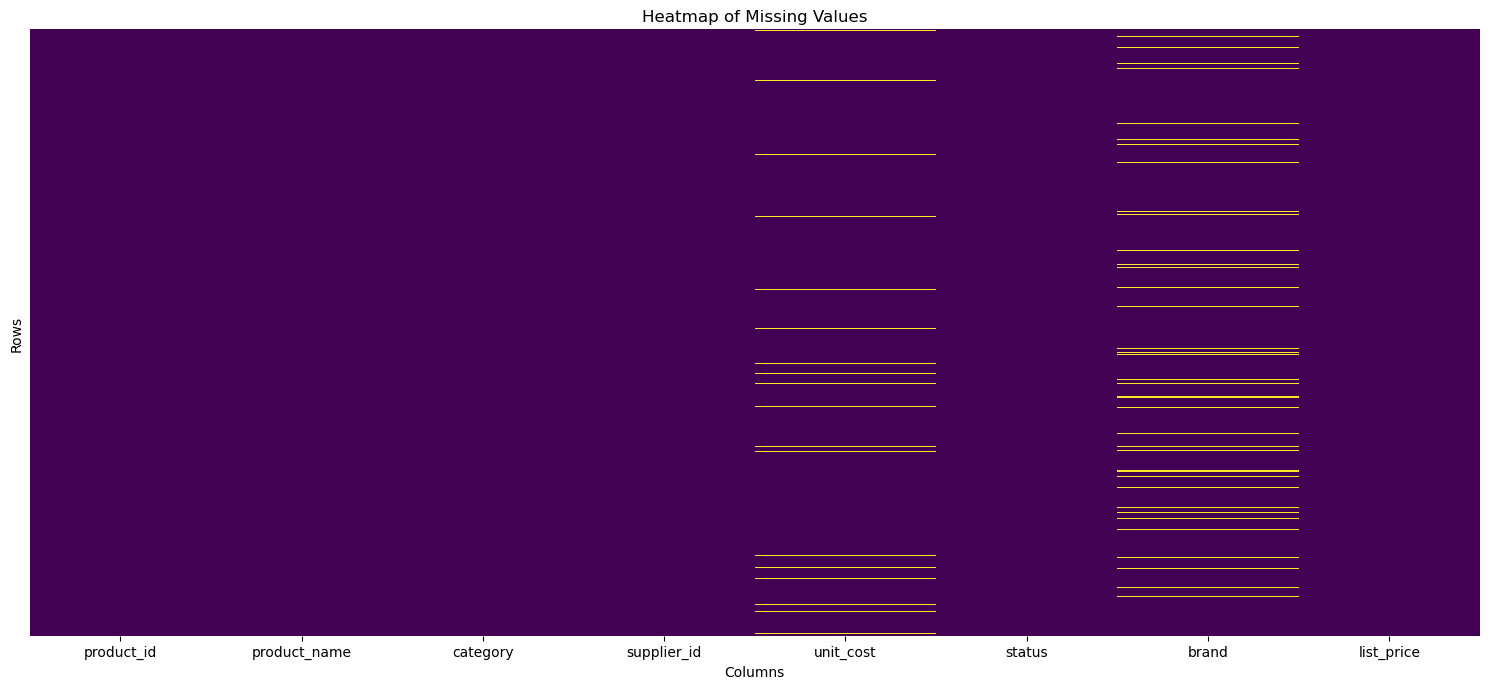

In [49]:
# Show missing values heatmap
missing_values_heatmap(df_products)

In [50]:
# Show pd.NA missing values for 'unit_cost', 'brand' columns
df_products.loc[(df_products['unit_cost'].isna()) | (df_products['brand'].isna()), :]

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price
6,7,home_produce,bakery,911,<NA>,backordered,<NA>,2.98
7,8,care_dairy,beverages,1628,"18,64",active,<NA>,26.67
19,20,movement_snacks,snacks,1098,<NA>,backordered,west_christensen,13.46
20,21,get_snacks,beverages,1150,"12,16",backordered,<NA>,15.50
22,23,popular_produce,bakery,762,"6,15",backordered,<NA>,10.04
...,...,...,...,...,...,...,...,...
9952,9953,coach_frozen_foods,snacks,1455,<NA>,active,smith_thomas_and_flores,17.53
9965,9966,continue_dairy,snacks,1624,<NA>,discontinued,evans_martinez,6.49
9971,9972,stock_produce,produce,1681,<NA>,backordered,chapman_group,9.48
9979,9980,water_produce,dairy,37,<NA>,backordered,williams_miller_and_jones,24.14


In [51]:
# Show percentage of missing values within the dataset
missing_values_rate(df_products, include=['unit_cost', 'brand'])

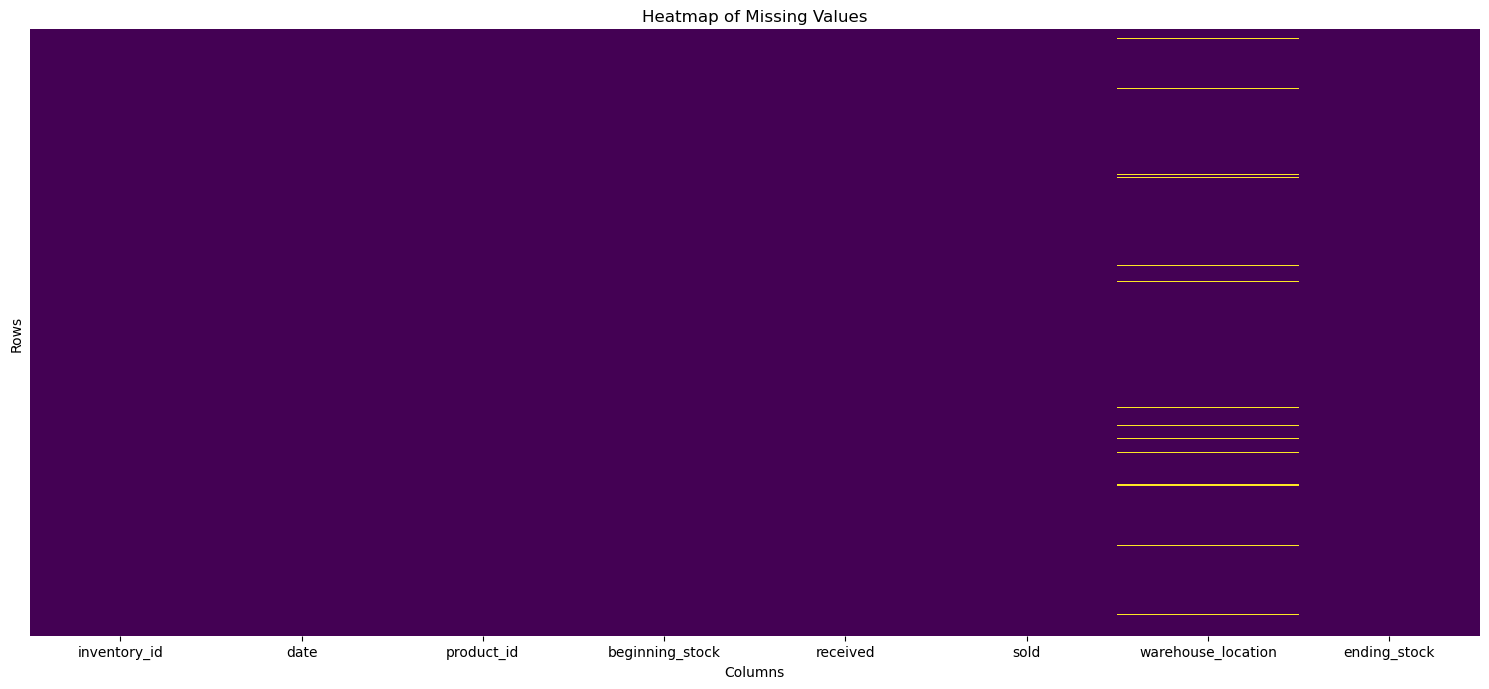

In [52]:
missing_values_heatmap(df_inventory)

In [53]:
# Show pd.NA missing values for 'warehouse_location' column
df_inventory.loc[(df_inventory['warehouse_location'].isna()), :]

,inventory_id,date,product_id,beginning_stock,received,sold,warehouse_location,ending_stock
35,36,2025-05-12,4703,22,12,14,<NA>,20
115,116,2025-06-14,3495,0,7,4,<NA>,3
132,133,2025-07-06,7841,57,12,6,<NA>,63
168,169,2025-06-27,5150,59,1,9,<NA>,51
175,176,2025-06-27,293,87,13,14,<NA>,86
...,...,...,...,...,...,...,...,...
19721,19722,2025-06-29,4567,31,17,9,<NA>,39
19734,19735,2025-06-10,8335,24,12,3,<NA>,33
19877,19878,2025-05-23,284,91,2,10,<NA>,83
19885,19886,2025-05-27,1135,39,16,1,<NA>,54


In [54]:
# Show percentage of missing values within the dataset
missing_values_rate(df_inventory, include=['warehouse_location'])

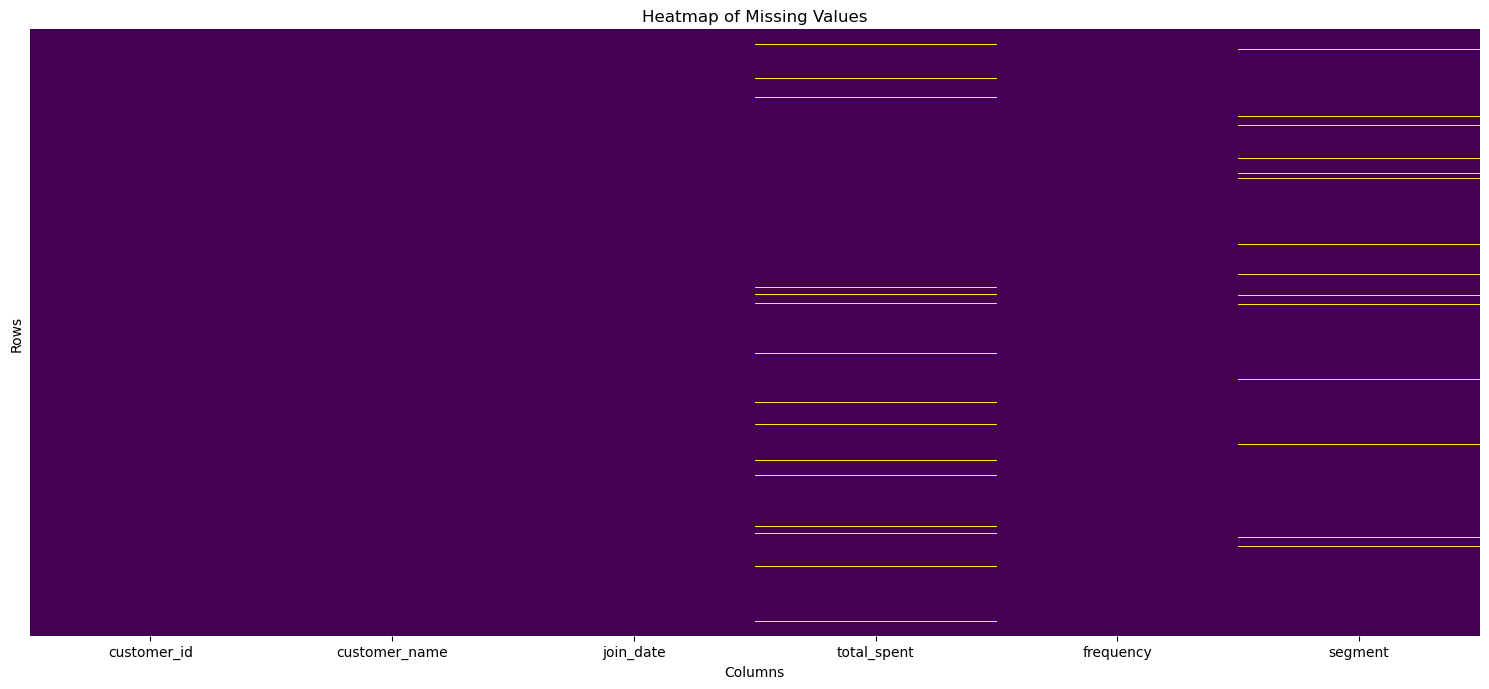

In [55]:
missing_values_heatmap(df_customers)

In [56]:
# Show pd.NA missing values for 'total_spent', 'segment' columns
df_customers.loc[(df_customers['total_spent'].isna()) | (df_customers['segment'].isna()), :]

,customer_id,customer_name,join_date,total_spent,frequency,segment
2,3,kimberly_green,2024-01-23,<NA>,15,high_value
28,29,ashley_briggs,2023-07-08,4375.77,3,<NA>
49,50,cindy_liu,2025-04-02,1226.24,39,<NA>
82,83,brent_mcfarland,2025-01-22,<NA>,16,occasional
110,111,charlene_cole,2024-05-17,2066.27,11,<NA>
...,...,...,...,...,...,...
4860,4861,susan_coleman,2025-01-23,<NA>,39,high_value
4874,4875,leslie_estrada,2025-03-07,1778.53,49,<NA>
4883,4884,mrs_rebecca_hines,2024-01-27,<NA>,31,high_value
4930,4931,martha_garcia,2025-04-24,<NA>,21,high_value


In [57]:
# Show percentage of missing values within the dataset
missing_values_rate(df_customers, include=['total_spent', 'segment'])

### 3.4 Casting data types.

#### 3.4.1 Casting to string data type.

In [58]:
# df_products 'product_name', 'brand', to string
df_products = cast_datatypes(df_products, 'string', c_include=['product_name', 'brand'])

print(df_products['product_name'].dtypes)
print(df_products['brand'].dtypes)

string
string


In [59]:
# df_suppliers 'supplier_name', 'contact_info', to string
df_suppliers = cast_datatypes(df_suppliers, 'string', c_include=['supplier_name', 'contact_info'])

print(df_suppliers['supplier_name'].dtypes)
print(df_suppliers['contact_info'].dtypes)

string
string


In [60]:
# df_customers 'customer_name', to string
df_customers = cast_datatypes(df_customers, 'string', c_include=['customer_name'])

print(df_customers['customer_name'].dtypes)

string


In [61]:
# df_salesforce 'employee_name', to string
df_salesforce = cast_datatypes(df_salesforce, 'string', c_include=['employee_name'])

print(df_salesforce['employee_name'].dtypes)

string


#### 3.4.2 Casting to numeric data type.

In [62]:
# df_products 'unit_cost', to Float64
df_products = cast_datatypes(df_products, 'numeric', numeric_type='Float64', c_include=['unit_cost'])

print(df_products['unit_cost'].dtypes)


Float64


In [63]:
# df_customers 'total_spent', to Float64
df_customers = cast_datatypes(df_customers, 'numeric', numeric_type="Float64", c_include=['total_spent'])

print(df_customers['total_spent'].dtypes)

Float64


#### 3.4.3 Casting to category data type.

In [64]:
# df_products 'category', 'status',  to category
df_products = cast_datatypes(df_products, 'category', c_include=['category', 'status'])

print(df_products['category'].dtypes)
print(df_products['status'].dtypes)

category
category


In [65]:
# df_inventory 'warehouse_location',  to category
df_inventory = cast_datatypes(df_inventory, 'category', c_include=['warehouse_location'])

print(df_inventory['warehouse_location'].dtypes)

category


In [66]:
# df_customers 'segment',  to category
df_customers = cast_datatypes(df_customers, 'category', c_include=['segment'])

print(df_customers['segment'].dtypes)

category


In [67]:
# df_salesforce 'region',  to category
df_salesforce = cast_datatypes(df_salesforce, 'category', c_include=['region'])

print(df_salesforce['region'].dtypes)

category


#### 3.4.4 Casting to boolean data type.

In [68]:
# NA

#### 3.4.5 Casting to datetime data type.

In [69]:
# df_inventory 'date' to datetime
df_inventory = cast_datatypes(df_inventory, 'datetime', date_format='%Y-%m-%d', c_time_zone='US/Pacific', c_include=['date'])

print(df_inventory['date'].dtypes)

datetime64[ns, US/Pacific]


In [70]:
# df_customers 'join_date' to datetime
df_customers = cast_datatypes(df_customers, 'datetime', date_format='%Y-%m-%d', c_time_zone='US/Pacific', c_include=['join_date'])

print(df_customers['join_date'].dtypes)

datetime64[ns, US/Pacific]


In [71]:
# df_transactions 'date' to datetime
df_transactions = cast_datatypes(df_transactions, 'datetime', date_format='%Y-%m-%d', c_time_zone='US/Pacific', c_include=['date'])

print(df_transactions['date'].dtypes)

datetime64[ns, US/Pacific]


### 3.5  Missing values data imputation.

#### 3.5.1 Missing values data imputation for df_products column 'unit_cost'.

In [72]:
# Handle df_products pd.NA missing values within 'unit_cost' column
# To estimate missing values in the 'unit_cost' column, we leverage the relationship between 'list_price' and 'unit_cost'.
# We first calculate the average markup ratio (list_price / unit_cost) using existing data,
# stratified by key product characteristics: 'product_name' and 'category', 'category' and 'brand'.
# This grouped average represents the typical revenue percentage applied to the unit cost for similar products.
# Missing 'unit_cost' values are then imputed by reversing the markup formula:
#     unit_cost = list_price / average_markup
# This approach ensures more accurate imputation by reflecting pricing patterns specific to each product segment.

In [73]:
df_uc_imp = df_products.dropna(subset=['unit_cost', 'list_price']).copy()
df_uc_imp['markup_ratio'] = df_uc_imp['list_price'] / df_uc_imp['unit_cost']
df_uc_imp

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price,markup_ratio
0,1,use_bakery,bakery,1664,4.58,active,warren_foster,5.99,1.30786
1,2,thank_frozen_foods,dairy,1662,5.43,backordered,evans_and_sons,7.03,1.294659
2,3,customer_produce,beverages,917,1.83,backordered,newman_and_sons,2.73,1.491803
3,4,sign_dairy,produce,268,8.99,active,mclaughlin_little,14.17,1.576196
4,5,place_frozen_foods,bakery,964,73.3,backordered,leblanc_james_and_thompson,11.08,0.15116
...,...,...,...,...,...,...,...,...,...
9995,9996,financial_bakery,snacks,1581,5.93,backordered,sparks_llc,7.40,1.247892
9996,9997,hospital_bakery,produce,1426,15.42,discontinued,butler_inc,18.92,1.226978
9997,9998,travel_bakery,produce,31,13.28,backordered,carr_larson,23.15,1.743223
9998,9999,learn_bakery,bakery,987,18.32,active,turner_rodriguez,22.50,1.228166


In [74]:
# Stratification by key product characteristics: 'product_name' and 'category'.
df_markup_by_group = (df_uc_imp.groupby(['product_name', 'category'], observed=True)['markup_ratio'].mean()
                      .reset_index(name='avg_markup_ratio'))
df_markup_by_group

,product_name,category,avg_markup_ratio
0,a_beverages,bakery,1.502008
1,a_beverages,snacks,1.432979
2,a_frozen_foods,bakery,1.691636
3,a_produce,frozen_foods,1.436011
4,a_produce,produce,1.366022
...,...,...,...
8275,yourself_dairy,dairy,1.80102
8276,yourself_produce,beverages,1.576678
8277,yourself_produce,dairy,1.304238
8278,yourself_produce,snacks,1.246212


In [75]:
df_products = df_products.merge(df_markup_by_group, how='left', on=['product_name', 'category'])
df_products

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price,avg_markup_ratio
0,1,use_bakery,bakery,1664,4.58,active,warren_foster,5.99,1.30786
1,2,thank_frozen_foods,dairy,1662,5.43,backordered,evans_and_sons,7.03,1.455065
2,3,customer_produce,beverages,917,1.83,backordered,newman_and_sons,2.73,1.491803
3,4,sign_dairy,produce,268,8.99,active,mclaughlin_little,14.17,1.576196
4,5,place_frozen_foods,bakery,964,73.3,backordered,leblanc_james_and_thompson,11.08,0.15116
...,...,...,...,...,...,...,...,...,...
9995,9996,financial_bakery,snacks,1581,5.93,backordered,sparks_llc,7.40,1.247892
9996,9997,hospital_bakery,produce,1426,15.42,discontinued,butler_inc,18.92,1.226978
9997,9998,travel_bakery,produce,31,13.28,backordered,carr_larson,23.15,1.581158
9998,9999,learn_bakery,bakery,987,18.32,active,turner_rodriguez,22.50,1.228166


In [76]:
df_products['unit_cost'] = df_products.apply(lambda row: row['list_price'] / row['avg_markup_ratio'] if pd.isna(row['unit_cost']) and 
                                             pd.notna(row['list_price']) and pd.notna(row['avg_markup_ratio']) else row['unit_cost'],
                                             axis=1)
df_products = df_products.drop(columns='avg_markup_ratio')
df_products

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price
0,1,use_bakery,bakery,1664,4.58,active,warren_foster,5.99
1,2,thank_frozen_foods,dairy,1662,5.43,backordered,evans_and_sons,7.03
2,3,customer_produce,beverages,917,1.83,backordered,newman_and_sons,2.73
3,4,sign_dairy,produce,268,8.99,active,mclaughlin_little,14.17
4,5,place_frozen_foods,bakery,964,73.3,backordered,leblanc_james_and_thompson,11.08
...,...,...,...,...,...,...,...,...
9995,9996,financial_bakery,snacks,1581,5.93,backordered,sparks_llc,7.40
9996,9997,hospital_bakery,produce,1426,15.42,discontinued,butler_inc,18.92
9997,9998,travel_bakery,produce,31,13.28,backordered,carr_larson,23.15
9998,9999,learn_bakery,bakery,987,18.32,active,turner_rodriguez,22.50


In [77]:
# Stratification by key product characteristics: 'category' and 'brand'.
df_markup_by_group = (df_uc_imp.groupby(['category', 'brand'], observed=True)['markup_ratio'].mean()
                      .reset_index(name='avg_markup_ratio'))
df_markup_by_group

,category,brand,avg_markup_ratio
0,bakery,abbott_ltd,1.622424
1,bakery,abbott_martin_and_mcgee,1.692625
2,bakery,adams_gonzalez,1.444053
3,bakery,adams_jackson,1.273251
4,bakery,adams_llc,1.7
...,...,...,...
8674,snacks,young_schneider,1.775814
8675,snacks,young_wheeler,1.378731
8676,snacks,zavala_brewer_and_watkins,1.639012
8677,snacks,zavala_kidd_and_berg,1.456583


In [78]:
df_products = df_products.merge(df_markup_by_group, how='left', on=['category', 'brand'])
df_products

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price,avg_markup_ratio
0,1,use_bakery,bakery,1664,4.58,active,warren_foster,5.99,1.30786
1,2,thank_frozen_foods,dairy,1662,5.43,backordered,evans_and_sons,7.03,1.294659
2,3,customer_produce,beverages,917,1.83,backordered,newman_and_sons,2.73,1.491803
3,4,sign_dairy,produce,268,8.99,active,mclaughlin_little,14.17,1.576196
4,5,place_frozen_foods,bakery,964,73.3,backordered,leblanc_james_and_thompson,11.08,0.15116
...,...,...,...,...,...,...,...,...,...
9995,9996,financial_bakery,snacks,1581,5.93,backordered,sparks_llc,7.40,1.247892
9996,9997,hospital_bakery,produce,1426,15.42,discontinued,butler_inc,18.92,1.226978
9997,9998,travel_bakery,produce,31,13.28,backordered,carr_larson,23.15,1.743223
9998,9999,learn_bakery,bakery,987,18.32,active,turner_rodriguez,22.50,1.228166


In [79]:
df_products['unit_cost'] = df_products.apply(lambda row: row['list_price'] / row['avg_markup_ratio'] if pd.isna(row['unit_cost']) and 
                                             pd.notna(row['list_price']) and pd.notna(row['avg_markup_ratio']) else row['unit_cost'],
                                             axis=1)
df_products = df_products.drop(columns='avg_markup_ratio')
df_products

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price
0,1,use_bakery,bakery,1664,4.58,active,warren_foster,5.99
1,2,thank_frozen_foods,dairy,1662,5.43,backordered,evans_and_sons,7.03
2,3,customer_produce,beverages,917,1.83,backordered,newman_and_sons,2.73
3,4,sign_dairy,produce,268,8.99,active,mclaughlin_little,14.17
4,5,place_frozen_foods,bakery,964,73.3,backordered,leblanc_james_and_thompson,11.08
...,...,...,...,...,...,...,...,...
9995,9996,financial_bakery,snacks,1581,5.93,backordered,sparks_llc,7.40
9996,9997,hospital_bakery,produce,1426,15.42,discontinued,butler_inc,18.92
9997,9998,travel_bakery,produce,31,13.28,backordered,carr_larson,23.15
9998,9999,learn_bakery,bakery,987,18.32,active,turner_rodriguez,22.50


In [80]:
# Stratification by key product characteristics: 'category'.
df_products = cast_datatypes(df_products, 'numeric', numeric_type="Float64", c_include=['unit_cost'])
df_products

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price
0,1,use_bakery,bakery,1664,4.58,active,warren_foster,5.99
1,2,thank_frozen_foods,dairy,1662,5.43,backordered,evans_and_sons,7.03
2,3,customer_produce,beverages,917,1.83,backordered,newman_and_sons,2.73
3,4,sign_dairy,produce,268,8.99,active,mclaughlin_little,14.17
4,5,place_frozen_foods,bakery,964,73.3,backordered,leblanc_james_and_thompson,11.08
...,...,...,...,...,...,...,...,...
9995,9996,financial_bakery,snacks,1581,5.93,backordered,sparks_llc,7.40
9996,9997,hospital_bakery,produce,1426,15.42,discontinued,butler_inc,18.92
9997,9998,travel_bakery,produce,31,13.28,backordered,carr_larson,23.15
9998,9999,learn_bakery,bakery,987,18.32,active,turner_rodriguez,22.50


In [81]:
df_products['unit_cost'].describe()

count       9656.0
mean     11.149196
std      12.173403
min            0.5
25%           5.25
50%          10.33
75%          15.19
max          199.6
Name: unit_cost, dtype: Float64

In [82]:
evaluate_central_trend(df_products, 'unit_cost')

In [83]:
df_category_median_cost = (df_products.groupby('category', observed=True)['unit_cost'].median().reset_index(name='median_unit_cost'))
df_category_median_cost

,category,median_unit_cost
0,bakery,10.3
1,beverages,10.405
2,dairy,10.28
3,frozen_foods,10.58
4,produce,9.855
5,snacks,10.47


In [84]:
df_products = df_products.merge(df_category_median_cost, how='left', on='category')
df_products

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price,median_unit_cost
0,1,use_bakery,bakery,1664,4.58,active,warren_foster,5.99,10.3
1,2,thank_frozen_foods,dairy,1662,5.43,backordered,evans_and_sons,7.03,10.28
2,3,customer_produce,beverages,917,1.83,backordered,newman_and_sons,2.73,10.405
3,4,sign_dairy,produce,268,8.99,active,mclaughlin_little,14.17,9.855
4,5,place_frozen_foods,bakery,964,73.3,backordered,leblanc_james_and_thompson,11.08,10.3
...,...,...,...,...,...,...,...,...,...
9995,9996,financial_bakery,snacks,1581,5.93,backordered,sparks_llc,7.40,10.47
9996,9997,hospital_bakery,produce,1426,15.42,discontinued,butler_inc,18.92,9.855
9997,9998,travel_bakery,produce,31,13.28,backordered,carr_larson,23.15,9.855
9998,9999,learn_bakery,bakery,987,18.32,active,turner_rodriguez,22.50,10.3


In [85]:
df_products['unit_cost'] = df_products.apply(lambda row: row['median_unit_cost'] if pd.isna(row['unit_cost']) else row['unit_cost'],
                                             axis=1)
df_products

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price,median_unit_cost
0,1,use_bakery,bakery,1664,4.58,active,warren_foster,5.99,10.3
1,2,thank_frozen_foods,dairy,1662,5.43,backordered,evans_and_sons,7.03,10.28
2,3,customer_produce,beverages,917,1.83,backordered,newman_and_sons,2.73,10.405
3,4,sign_dairy,produce,268,8.99,active,mclaughlin_little,14.17,9.855
4,5,place_frozen_foods,bakery,964,73.30,backordered,leblanc_james_and_thompson,11.08,10.3
...,...,...,...,...,...,...,...,...,...
9995,9996,financial_bakery,snacks,1581,5.93,backordered,sparks_llc,7.40,10.47
9996,9997,hospital_bakery,produce,1426,15.42,discontinued,butler_inc,18.92,9.855
9997,9998,travel_bakery,produce,31,13.28,backordered,carr_larson,23.15,9.855
9998,9999,learn_bakery,bakery,987,18.32,active,turner_rodriguez,22.50,10.3


In [86]:
df_product = df_products.drop(columns='median_unit_cost')
df_products

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price,median_unit_cost
0,1,use_bakery,bakery,1664,4.58,active,warren_foster,5.99,10.3
1,2,thank_frozen_foods,dairy,1662,5.43,backordered,evans_and_sons,7.03,10.28
2,3,customer_produce,beverages,917,1.83,backordered,newman_and_sons,2.73,10.405
3,4,sign_dairy,produce,268,8.99,active,mclaughlin_little,14.17,9.855
4,5,place_frozen_foods,bakery,964,73.30,backordered,leblanc_james_and_thompson,11.08,10.3
...,...,...,...,...,...,...,...,...,...
9995,9996,financial_bakery,snacks,1581,5.93,backordered,sparks_llc,7.40,10.47
9996,9997,hospital_bakery,produce,1426,15.42,discontinued,butler_inc,18.92,9.855
9997,9998,travel_bakery,produce,31,13.28,backordered,carr_larson,23.15,9.855
9998,9999,learn_bakery,bakery,987,18.32,active,turner_rodriguez,22.50,10.3


##### `LSPL`

**Note:**

- Missing values in __df_products__, _'unit_cost'_ column

Missing values in the `unit_cost` column were initially present in approximately **5%** of the products. These gaps can significantly affect financial indicators such as gross margin, inventory valuation, and pricing analysis.

__Solution__: All missing values in `unit_cost` were imputed using a **three-level stratified markup ratio strategy**. First, we calculated average markup ratios based on `'product_name'` and `'category'`. Second, the rest of the missing values that couldn't be matched, , it was used a broader grouping based on `'category'` and `'brand'`. Third, any other remaining missing values (~3%) were imputed using the **median unit cost by `category`**, ensuring robust and context-aware estimates.

__Impact__: This approach helped ensure **100% completeness** of the `unit_cost` column. It supports accurate profitability analysis, cost modeling, and business decision-making. Using stratified and statistically robust imputation helps preserve business logic and prevents misleading insights due to arbitrary or uniform imputation (e.g., using 0s).


#### 3.5.2 Missing values data imputation for df_products column 'brand'.

In [87]:
# Missing values imputation for 'brand' column with 'unknown' 
df_products['brand'] = df_products['brand'].fillna("unknown")
df_products

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price,median_unit_cost
0,1,use_bakery,bakery,1664,4.58,active,warren_foster,5.99,10.3
1,2,thank_frozen_foods,dairy,1662,5.43,backordered,evans_and_sons,7.03,10.28
2,3,customer_produce,beverages,917,1.83,backordered,newman_and_sons,2.73,10.405
3,4,sign_dairy,produce,268,8.99,active,mclaughlin_little,14.17,9.855
4,5,place_frozen_foods,bakery,964,73.30,backordered,leblanc_james_and_thompson,11.08,10.3
...,...,...,...,...,...,...,...,...,...
9995,9996,financial_bakery,snacks,1581,5.93,backordered,sparks_llc,7.40,10.47
9996,9997,hospital_bakery,produce,1426,15.42,discontinued,butler_inc,18.92,9.855
9997,9998,travel_bakery,produce,31,13.28,backordered,carr_larson,23.15,9.855
9998,9999,learn_bakery,bakery,987,18.32,active,turner_rodriguez,22.50,10.3


##### `LSPL`

**Note:**  

1. Missing values in __df_products__, _'brand'_ column

Missing values in the `brand` column occur in approximately **5%** of the dataset (500 out of 10,000 rows). Since `brand` is a high-cardinality categorical feature closely tied to `product_name`, and given that `product_name` is not unique across rows (only 8,241 unique values out of 10,000), there's no reliable reference to safely impute this field without risking data distortion.

__Solution__: All missing values in `brand` will be imputed as, `"unknown"` for visualization purposes but not for modeling or relational joins.

__Impact__: Preserving the missing values adn identified as `"unknown"` ensures that no incorrect brand associations are introduced. This approach protects the quality of product-vendor analyses, brand-level performance metrics, and any downstream processes that rely on accurate brand identification.


#### 3.5.3 Missing values data imputation for df_inventory column 'warehouse_location'.

In [88]:
# Check relations between df_transactions['product_id', 'units_sold', 'employee_id'], df_salesforce['employee_id', 'region'], 
# df_inventory['product_id', 'warehouse_location']

df_salesforce_empid_reg = df_salesforce.loc[:, ['employee_id', 'region']].drop_duplicates()
df_salesforce_empid_reg 

,employee_id,region
0,1,North
1,2,South
2,3,South
3,4,South
4,5,West
...,...,...
1995,1996,North
1996,1997,North
1997,1998,East
1998,1999,East


In [89]:
df_transactions_prodid_sld_empid = df_transactions.loc[~(df_transactions['units_sold'].isna()) & (df_transactions['units_sold'] > 0), ['product_id', 'employee_id']]
df_transactions_prodid_sld_empid

,product_id,employee_id
0,68,748
1,5042,624
2,7165,139
3,8859,778
4,4700,1429
...,...,...
19995,4112,1724
19996,4011,717
19997,3824,146
19998,7109,8


In [90]:
df_trans_sales = df_transactions_prodid_sld_empid.merge(df_salesforce_empid_reg, on='employee_id', how='left')
df_trans_sales

,product_id,employee_id,region
0,68,748,South
1,5042,624,North
2,7165,139,North
3,8859,778,North
4,4700,1429,West
...,...,...,...
19995,4112,1724,East
19996,4011,717,West
19997,3824,146,South
19998,7109,8,East


In [91]:
df_inventory_prodid_whloc = df_inventory.loc[(df_inventory['warehouse_location'].isna()), ['product_id', 'warehouse_location']]
df_inventory_prodid_whloc

,product_id,warehouse_location
35,4703,NaN
115,3495,NaN
132,7841,NaN
168,5150,NaN
175,293,NaN
...,...,...
19721,4567,NaN
19734,8335,NaN
19877,284,NaN
19885,1135,NaN


In [92]:
df_inventory_prodid_whloc = df_inventory_prodid_whloc.merge(df_trans_sales, on='product_id', how='left')
df_inventory_prodid_whloc

,product_id,warehouse_location,employee_id,region
0,4703,NaN,1143.0,West
1,4703,NaN,1441.0,West
2,3495,NaN,1700.0,North
3,3495,NaN,58.0,South
4,7841,NaN,1004.0,East
...,...,...,...,...
882,284,NaN,612.0,West
883,284,NaN,1872.0,West
884,1135,NaN,635.0,South
885,1135,NaN,780.0,East


In [93]:
region_counts = (df_inventory_prodid_whloc.groupby('product_id')['region'].nunique().reset_index(name='unique_region_count'))
region_counts

,product_id,unique_region_count
0,15,2
1,19,1
2,26,3
3,45,3
4,51,2
...,...,...
384,9670,3
385,9744,3
386,9823,1
387,9875,1


In [94]:
region_counts = region_counts.loc[region_counts['unique_region_count'] == 1, 'product_id']
region_counts

1        19
9       200
10      218
19      368
21      422
       ... 
376    9415
381    9523
383    9664
386    9823
387    9875
Name: product_id, Length: 144, dtype: int64

In [95]:
region_counts

1        19
9       200
10      218
19      368
21      422
       ... 
376    9415
381    9523
383    9664
386    9823
387    9875
Name: product_id, Length: 144, dtype: int64

In [96]:
df_inventory_prodid_whloc = df_inventory_prodid_whloc[df_inventory_prodid_whloc['product_id'].isin(region_counts)]
df_inventory_prodid_whloc

,product_id,warehouse_location,employee_id,region
0,4703,NaN,1143.0,West
1,4703,NaN,1441.0,West
14,3333,NaN,441.0,East
26,3695,NaN,119.0,East
27,3695,NaN,1876.0,East
...,...,...,...,...
868,3423,NaN,358.0,East
869,4106,NaN,449.0,North
870,4106,NaN,975.0,North
878,8335,NaN,185.0,East


In [97]:
df_inventory_prodid_whloc = df_inventory_prodid_whloc[~df_inventory_prodid_whloc.duplicated(subset=['product_id'], keep=False)]
df_inventory_prodid_whloc = df_inventory_prodid_whloc.drop(columns=['warehouse_location', 'employee_id'])
df_inventory_prodid_whloc

,product_id,region
14,3333,East
33,986,South
41,6294,East
42,457,North
45,723,East
...,...,...
844,2130,North
863,368,West
866,2270,South
878,8335,East


In [98]:
df_inventory = df_inventory.merge(df_inventory_prodid_whloc, on='product_id', how='left')
df_inventory

,inventory_id,date,product_id,beginning_stock,received,sold,warehouse_location,ending_stock,region
0,1,2025-06-20 00:00:00-07:00,1505,49,12,7,East,54,NaN
1,2,2025-05-13 00:00:00-07:00,1611,55,2,6,South,51,NaN
2,3,2025-07-02 00:00:00-07:00,1310,82,5,3,North,84,NaN
3,4,2025-05-14 00:00:00-07:00,2355,14,11,14,West,11,NaN
4,5,2025-06-13 00:00:00-07:00,8382,39,17,11,East,45,NaN
...,...,...,...,...,...,...,...,...,...
19995,19996,2025-05-25 00:00:00-07:00,7842,71,4,2,South,73,NaN
19996,19997,2025-05-22 00:00:00-07:00,4965,84,12,2,East,94,NaN
19997,19998,2025-05-19 00:00:00-07:00,6455,24,4,5,East,23,NaN
19998,19999,2025-06-21 00:00:00-07:00,2555,97,0,6,West,91,NaN


In [99]:
df_inventory['warehouse_location'] = df_inventory.apply(lambda row: row['region'] if pd.isna(row['warehouse_location']) else row['warehouse_location'],
                                                        axis=1)
df_inventory

,inventory_id,date,product_id,beginning_stock,received,sold,warehouse_location,ending_stock,region
0,1,2025-06-20 00:00:00-07:00,1505,49,12,7,East,54,NaN
1,2,2025-05-13 00:00:00-07:00,1611,55,2,6,South,51,NaN
2,3,2025-07-02 00:00:00-07:00,1310,82,5,3,North,84,NaN
3,4,2025-05-14 00:00:00-07:00,2355,14,11,14,West,11,NaN
4,5,2025-06-13 00:00:00-07:00,8382,39,17,11,East,45,NaN
...,...,...,...,...,...,...,...,...,...
19995,19996,2025-05-25 00:00:00-07:00,7842,71,4,2,South,73,NaN
19996,19997,2025-05-22 00:00:00-07:00,4965,84,12,2,East,94,NaN
19997,19998,2025-05-19 00:00:00-07:00,6455,24,4,5,East,23,NaN
19998,19999,2025-06-21 00:00:00-07:00,2555,97,0,6,West,91,NaN


In [100]:
df_inventory = df_inventory.drop(columns='region')

In [101]:
df_inventory = cast_datatypes(df_inventory, 'category', c_include=['warehouse_location'])

##### `LSPL`

**Note:**

1. Missing values in __df_inventory__, _'warehouse_location'_ column

Missing values in the `warehouse_location` column were initially present in **approximately 400 rows**. Since there is no direct warehouse mapping in the dataset, imputing based on internal columns was not feasible.

__Solution__: A cross-table imputation was performed using a custom reference DataFrame (`df_inventory_prodid_whloc`) that associated each `product_id` with a unique `region`, derived from historical sales data (`employee_id` → `region`). Products with consistent regional assignment were used to infer warehouse location — that is, product_id entries sold exclusively through employees from a single region — were used to infer warehouse_location. This condition was strictly enforced to prevent incorrect inferences, as products linked to multiple regions could introduce significant distortion to the data. After merging and imputing, the missing values were reduced from 400 to **297**.

For the remaining missing values: A warehouse location is a required field in any well-established retail business. If it's missing, it's a critical data gap—not a valid category like "Unknown". Keeping the value as pd.NA allows:

- Easy identification of records requiring manual review or investigation.
- Cleaner visualizations and statistical summaries, avoiding distortion from artificial placeholders like "Unknown".

Preserving missing values helps communicate clearly to clients or stakeholders that this is an actual data deficiency, not an assumed or acceptable default.

__Impact__: This strategy improves the geographic completeness of inventory records while maintaining logical consistency. It allows for more accurate analysis of inventory distribution, product coverage, and potential stock allocation by region, without introducing arbitrary assumptions.

#### 3.5.4 Missing values data imputation for df_customers column 'total_spent'.

In [102]:
# Missing values in the 'total_spent' column of df_customers will be imputed by calculating the sum of all 'sales_amount' values from 
# df_transactions, grouped by 'customer_id'. The resulting aggregated values will be joined back to df_customers using 'customer_id',
# allowing for the imputation of missing 'total_spent' entries.

df_customers_na_totalspent = df_customers.loc[(df_customers['total_spent'].isna()), ['customer_id', 'total_spent']]
df_customers_na_totalspent

,customer_id,total_spent
2,3,<NA>
82,83,<NA>
125,126,<NA>
129,130,<NA>
145,146,<NA>
...,...,...
4810,4811,<NA>
4836,4837,<NA>
4860,4861,<NA>
4883,4884,<NA>


In [103]:
df_customers_transactions_salesamount = df_transactions.loc[(df_transactions['customer_id'].isin(df_customers_na_totalspent['customer_id'])), :]
df_customers_transactions_salesamount

,transaction_id,date,product_id,units_sold,customer_id,employee_id,list_price,sales_amount
12,13,2023-11-13 00:00:00-08:00,4366,7,433,1775,12.14,84.98
15,16,2023-11-17 00:00:00-08:00,4065,9,3910,1577,7.75,69.75
47,48,2024-12-26 00:00:00-08:00,1472,4,3164,794,19.43,77.72
95,96,2025-02-10 00:00:00-08:00,2698,8,969,220,24.25,194.00
109,110,2025-02-19 00:00:00-08:00,1785,3,563,496,5.05,15.15
...,...,...,...,...,...,...,...,...
19884,19885,2024-08-30 00:00:00-07:00,6733,2,3557,1937,14.92,29.84
19887,19888,2024-02-23 00:00:00-08:00,7230,4,3640,945,3.90,15.60
19901,19902,2023-10-05 00:00:00-07:00,294,9,1127,1758,6.96,62.64
19953,19954,2024-12-30 00:00:00-08:00,9456,7,4619,1760,24.63,172.41


In [104]:
df_customers_transactions_salesamount = df_customers_transactions_salesamount.groupby('customer_id')['sales_amount'].sum().reset_index()
df_customers_transactions_salesamount

,customer_id,sales_amount
0,3,789.85
1,83,20.45
2,126,343.23
3,130,73.28
4,146,285.76
...,...,...
143,4811,331.11
144,4837,40.92
145,4861,186.10
146,4884,100.07


In [105]:
df_customers = df_customers.merge(df_customers_transactions_salesamount, on='customer_id', how='left')
df_customers

,customer_id,customer_name,join_date,total_spent,frequency,segment,sales_amount
0,1,charles_miller,2024-08-13 00:00:00-07:00,294.24,12,occasional,NaN
1,2,michael_long,2024-09-03 00:00:00-07:00,4011.83,7,frequent,NaN
2,3,kimberly_green,2024-01-23 00:00:00-08:00,<NA>,15,high_value,789.85
3,4,beverly_bowers,2024-11-03 00:00:00-07:00,1403.0,13,occasional,NaN
4,5,pamela_berg,2024-08-05 00:00:00-07:00,1354.18,18,high_value,NaN
...,...,...,...,...,...,...,...
4995,4996,bryan_jones,2024-08-06 00:00:00-07:00,3112.13,43,frequent,NaN
4996,4997,sharon_lee,2025-02-14 00:00:00-08:00,608.13,5,occasional,NaN
4997,4998,gabrielle_kelly,2025-01-16 00:00:00-08:00,1766.59,38,frequent,NaN
4998,4999,christina_larson,2023-12-17 00:00:00-08:00,1370.75,37,high_value,NaN


In [106]:
df_customers['total_spent'] = df_customers.apply(lambda row: row['sales_amount'] if pd.isna(row['total_spent']) else row['total_spent'], axis=1)
df_customers = df_customers.drop(columns=['sales_amount'])
df_customers

,customer_id,customer_name,join_date,total_spent,frequency,segment
0,1,charles_miller,2024-08-13 00:00:00-07:00,294.24,12,occasional
1,2,michael_long,2024-09-03 00:00:00-07:00,4011.83,7,frequent
2,3,kimberly_green,2024-01-23 00:00:00-08:00,789.85,15,high_value
3,4,beverly_bowers,2024-11-03 00:00:00-07:00,1403.00,13,occasional
4,5,pamela_berg,2024-08-05 00:00:00-07:00,1354.18,18,high_value
...,...,...,...,...,...,...
4995,4996,bryan_jones,2024-08-06 00:00:00-07:00,3112.13,43,frequent
4996,4997,sharon_lee,2025-02-14 00:00:00-08:00,608.13,5,occasional
4997,4998,gabrielle_kelly,2025-01-16 00:00:00-08:00,1766.59,38,frequent
4998,4999,christina_larson,2023-12-17 00:00:00-08:00,1370.75,37,high_value


In [107]:
df_customers.loc[(df_customers['total_spent'].isna()), :]

,customer_id,customer_name,join_date,total_spent,frequency,segment
1054,1055,gabriel_sanford,2024-10-30 00:00:00-07:00,NaN,17,frequent
1191,1192,megan_garcia,2023-09-17 00:00:00-07:00,NaN,26,frequent


In [108]:
# customer_id = [1055, 1192] do not appear in df_transactions,meaning that — within the scope of this dataset — they have no recorded purchases.
# Therefore, their 'total_spent' will be imputed as 0. This approach preserves their records, as both are labeled as 'frequent' in the 'segment'
# column, suggesting they are considered valuable customers despite the absence of transaction data.

df_customers['total_spent'] = df_customers['total_spent'].fillna(0)
df_customers

,customer_id,customer_name,join_date,total_spent,frequency,segment
0,1,charles_miller,2024-08-13 00:00:00-07:00,294.24,12,occasional
1,2,michael_long,2024-09-03 00:00:00-07:00,4011.83,7,frequent
2,3,kimberly_green,2024-01-23 00:00:00-08:00,789.85,15,high_value
3,4,beverly_bowers,2024-11-03 00:00:00-07:00,1403.00,13,occasional
4,5,pamela_berg,2024-08-05 00:00:00-07:00,1354.18,18,high_value
...,...,...,...,...,...,...
4995,4996,bryan_jones,2024-08-06 00:00:00-07:00,3112.13,43,frequent
4996,4997,sharon_lee,2025-02-14 00:00:00-08:00,608.13,5,occasional
4997,4998,gabrielle_kelly,2025-01-16 00:00:00-08:00,1766.59,38,frequent
4998,4999,christina_larson,2023-12-17 00:00:00-08:00,1370.75,37,high_value


#### 3.5.5 Missing values data imputation for df_customers column 'segment'.

In [109]:
# Missing values in the 'segment' column of df_customers will be imputed based on frequency ranges, using the relationship observed between
# existing 'segment' labels and the 'frequency' column.

df_frequency_segment = df_customers.groupby(['segment', 'frequency'])['frequency'].count()
df_frequency_segment

C:\Users\luisp\AppData\Local\Temp\ipykernel_24808\919447401.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_frequency_segment = df_customers.groupby(['segment', 'frequency'])['frequency'].count()


segment     frequency
frequent    1            24
            2            30
            3            32
            4            27
            5            28
                         ..
occasional  45           42
            46           24
            47           36
            48           29
            49           49
Name: frequency, Length: 147, dtype: int64

In [110]:
# Missing values in the 'segment' column of df_customers will be imputed based on total_spent averages.
evaluate_central_trend(df_customers, 'total_spent')

In [111]:
df_customers_segment_tspent = df_customers.groupby('segment', observed=True)['total_spent'].median()
print(df_customers_segment_tspent)

segment
frequent      2575.810
high_value    2310.865
occasional    2424.670
Name: total_spent, dtype: float64


##### `LSPL`

**Note:** 

Missing values in df_customers, 'segment' column

Missing values in the `segment` column occur for a small subset of customers. An analysis was conducted to explore whether this column could be imputed using related variables such as `total_spent` and `frequency`.

__Solution__: All missing values in segment will be preserved as pd.NA, since there is no strong correlation or meaningful separation between segments when grouped by `total_spent` or `frequency`. Attempting to impute based on these columns could introduce inaccurate classifications.

__Impact__: Identifying customers with missing `segment` values helps maintain data integrity and analytical transparency, avoiding biased segment assignment and preserving the original structure for future refinement if better data becomes available.



### 3.6 Implicit duplicates.

#### 3.6.1 Implicit duplicates check.

In [112]:
# Show implicit duplicates df_customers
detect_implicit_duplicates_fuzzy(df_customers, 'customer_name')

> Scanning for duplicates ...: 100%|██████████| 4839/4839 [01:54<00:00, 42.17it/s]


In [113]:
detect_implicit_duplicates_fuzzy(df_salesforce, 'employee_name')

> Scanning for duplicates ...: 100%|██████████| 1972/1972 [00:18<00:00, 104.24it/s]


In [114]:
detect_implicit_duplicates_fuzzy(df_suppliers, 'supplier_name')

> Scanning for duplicates ...: 100%|██████████| 1899/1899 [00:25<00:00, 75.94it/s]


#### 3.6.2 Implicit duplicates data imputation.

In [115]:
# After reviewing the DataFrames for df_customers, df_salesforce, df_suppliers, "names", no imputation or correction of implicit duplicates 
# will be performed. This decision is based on the fact that the dataset is part of a simulation, and there is no solid backup information 
# or customer feedback available to validate or confirm any potential corrections.
# Making assumptions without reliable context could lead to inaccurate or biased results.


## __4. Final cleaning dataframe review__.

In [116]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype                     
---  ------         --------------  -----                     
 0   customer_id    5000 non-null   int64                     
 1   customer_name  5000 non-null   string                    
 2   join_date      5000 non-null   datetime64[ns, US/Pacific]
 3   total_spent    5000 non-null   float64                   
 4   frequency      5000 non-null   int64                     
 5   segment        4850 non-null   category                  
dtypes: category(1), datetime64[ns, US/Pacific](1), float64(1), int64(2), string(1)
memory usage: 200.5 KB


In [117]:
df_customers

,customer_id,customer_name,join_date,total_spent,frequency,segment
0,1,charles_miller,2024-08-13 00:00:00-07:00,294.24,12,occasional
1,2,michael_long,2024-09-03 00:00:00-07:00,4011.83,7,frequent
2,3,kimberly_green,2024-01-23 00:00:00-08:00,789.85,15,high_value
3,4,beverly_bowers,2024-11-03 00:00:00-07:00,1403.00,13,occasional
4,5,pamela_berg,2024-08-05 00:00:00-07:00,1354.18,18,high_value
...,...,...,...,...,...,...
4995,4996,bryan_jones,2024-08-06 00:00:00-07:00,3112.13,43,frequent
4996,4997,sharon_lee,2025-02-14 00:00:00-08:00,608.13,5,occasional
4997,4998,gabrielle_kelly,2025-01-16 00:00:00-08:00,1766.59,38,frequent
4998,4999,christina_larson,2023-12-17 00:00:00-08:00,1370.75,37,high_value


In [118]:
df_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype                     
---  ------              --------------  -----                     
 0   inventory_id        20000 non-null  int64                     
 1   date                20000 non-null  datetime64[ns, US/Pacific]
 2   product_id          20000 non-null  int64                     
 3   beginning_stock     20000 non-null  int64                     
 4   received            20000 non-null  int64                     
 5   sold                20000 non-null  int64                     
 6   warehouse_location  19703 non-null  category                  
 7   ending_stock        20000 non-null  int64                     
dtypes: category(1), datetime64[ns, US/Pacific](1), int64(6)
memory usage: 1.1 MB


In [119]:
df_inventory

,inventory_id,date,product_id,beginning_stock,received,sold,warehouse_location,ending_stock
0,1,2025-06-20 00:00:00-07:00,1505,49,12,7,East,54
1,2,2025-05-13 00:00:00-07:00,1611,55,2,6,South,51
2,3,2025-07-02 00:00:00-07:00,1310,82,5,3,North,84
3,4,2025-05-14 00:00:00-07:00,2355,14,11,14,West,11
4,5,2025-06-13 00:00:00-07:00,8382,39,17,11,East,45
...,...,...,...,...,...,...,...,...
19995,19996,2025-05-25 00:00:00-07:00,7842,71,4,2,South,73
19996,19997,2025-05-22 00:00:00-07:00,4965,84,12,2,East,94
19997,19998,2025-05-19 00:00:00-07:00,6455,24,4,5,East,23
19998,19999,2025-06-21 00:00:00-07:00,2555,97,0,6,West,91


In [120]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   product_id        10000 non-null  int64   
 1   product_name      10000 non-null  string  
 2   category          10000 non-null  category
 3   supplier_id       10000 non-null  int64   
 4   unit_cost         10000 non-null  float64 
 5   status            10000 non-null  category
 6   brand             10000 non-null  string  
 7   list_price        10000 non-null  float64 
 8   median_unit_cost  10000 non-null  Float64 
dtypes: Float64(1), category(2), float64(2), int64(2), string(2)
memory usage: 576.6 KB


In [121]:
df_products

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price,median_unit_cost
0,1,use_bakery,bakery,1664,4.58,active,warren_foster,5.99,10.3
1,2,thank_frozen_foods,dairy,1662,5.43,backordered,evans_and_sons,7.03,10.28
2,3,customer_produce,beverages,917,1.83,backordered,newman_and_sons,2.73,10.405
3,4,sign_dairy,produce,268,8.99,active,mclaughlin_little,14.17,9.855
4,5,place_frozen_foods,bakery,964,73.30,backordered,leblanc_james_and_thompson,11.08,10.3
...,...,...,...,...,...,...,...,...,...
9995,9996,financial_bakery,snacks,1581,5.93,backordered,sparks_llc,7.40,10.47
9996,9997,hospital_bakery,produce,1426,15.42,discontinued,butler_inc,18.92,9.855
9997,9998,travel_bakery,produce,31,13.28,backordered,carr_larson,23.15,9.855
9998,9999,learn_bakery,bakery,987,18.32,active,turner_rodriguez,22.50,10.3


In [122]:
df_salesforce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   employee_id    2000 non-null   int64   
 1   employee_name  2000 non-null   string  
 2   region         2000 non-null   category
 3   total_sales    2000 non-null   float64 
 4   effectiveness  2000 non-null   float64 
dtypes: category(1), float64(2), int64(1), string(1)
memory usage: 80.3 KB


In [123]:
df_salesforce

,employee_id,employee_name,region,total_sales,effectiveness
0,1,angela_marks,North,75912.60,0.73
1,2,richard_ayala,South,55019.09,0.88
2,3,dr_mark_bailey,South,37066.43,0.66
3,4,mark_miller,South,47485.74,0.74
4,5,zachary_bond,West,74696.77,0.65
...,...,...,...,...,...
1995,1996,colton_hernandez,North,82006.53,0.61
1996,1997,amber_robbins,North,25098.12,0.64
1997,1998,william_rodriguez,East,49527.16,0.89
1998,1999,stephen_pham,East,52694.36,0.73


In [124]:
df_suppliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   supplier_id     2000 non-null   int64  
 1   supplier_name   2000 non-null   string 
 2   lead_time_days  2000 non-null   int64  
 3   contact_info    2000 non-null   string 
 4   rating          2000 non-null   float64
dtypes: float64(1), int64(2), string(2)
memory usage: 93.8 KB


In [125]:
df_suppliers

,supplier_id,supplier_name,lead_time_days,contact_info,rating
0,1,stevens_llc,10,365-261-6825,4.69
1,2,simpson_pugh,8,001-322-445-9942,3.85
2,3,harrison_ltd,5,(745)078-2755,3.53
3,4,larson_orozco,4,347.918.3271x629,4.18
4,5,gray_lopez,6,+1-453-092-4991,3.85
...,...,...,...,...,...
1995,1996,santana_chang,12,001-359-810-0500x1001,3.73
1996,1997,romero_group,11,557-553-1159x819,3.03
1997,1998,jones_plc,10,779.173.9316x836,3.39
1998,1999,weber_gonzalez_and_mccullough,12,(927)346-5883,4.07


In [126]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype                     
---  ------          --------------  -----                     
 0   transaction_id  20000 non-null  int64                     
 1   date            20000 non-null  datetime64[ns, US/Pacific]
 2   product_id      20000 non-null  int64                     
 3   units_sold      20000 non-null  int64                     
 4   customer_id     20000 non-null  int64                     
 5   employee_id     20000 non-null  int64                     
 6   list_price      20000 non-null  float64                   
 7   sales_amount    20000 non-null  float64                   
dtypes: datetime64[ns, US/Pacific](1), float64(2), int64(5)
memory usage: 1.4 MB


In [127]:
df_transactions

,transaction_id,date,product_id,units_sold,customer_id,employee_id,list_price,sales_amount
0,1,2024-05-11 00:00:00-07:00,68,3,3240,748,25.00,75.00
1,2,2024-11-15 00:00:00-08:00,5042,6,2246,624,2.45,14.70
2,3,2024-03-19 00:00:00-07:00,7165,6,4387,139,2.68,16.08
3,4,2024-05-26 00:00:00-07:00,8859,7,2163,778,9.15,64.05
4,5,2024-01-24 00:00:00-08:00,4700,5,4297,1429,3.56,17.80
...,...,...,...,...,...,...,...,...
19995,19996,2025-03-08 00:00:00-08:00,4112,7,1464,1724,20.16,141.12
19996,19997,2024-03-29 00:00:00-07:00,4011,8,4450,717,1.83,14.64
19997,19998,2024-11-27 00:00:00-08:00,3824,8,4771,146,13.27,106.16
19998,19999,2024-06-26 00:00:00-07:00,7109,8,1096,8,28.17,225.36


## __5. Generate a new clean Data set .csv file__.

In [128]:
project_root = Path.cwd().parent
processed_path = project_root / "data" / "processed" / "clean" / "customers_clean.csv"
df_customers.to_csv(processed_path, index=False)

In [129]:
project_root = Path.cwd().parent
processed_path = project_root / "data" / "processed" / "clean" / "inventory_clean.csv"
df_inventory.to_csv(processed_path, index=False)

In [130]:
project_root = Path.cwd().parent
processed_path = project_root / "data" / "processed" / "clean" / "products_clean.csv"
df_products.to_csv(processed_path, index=False)

In [131]:
project_root = Path.cwd().parent
processed_path = project_root / "data" / "processed" / "clean" / "suppliers_clean.csv"
df_suppliers.to_csv(processed_path, index=False)

In [132]:
project_root = Path.cwd().parent
processed_path = project_root / "data" / "processed" / "clean" / "transactions_clean.csv"
df_transactions.to_csv(processed_path, index=False)